In [ ]:
!pip install tensorflow==2.11.0
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import math

In [ ]:
SAMPLES = 1000
SEED = 1337
np.random.seed(SEED)
tf.random.set_seed(SEED)
x_values = np.random.uniform(low=0, high=2*math.pi, size=SAMPLES)
np.random.shuffle(x_values)
y_values = np.sin(x_values)

In [ ]:
y_values += 0.1 * np.random.randn(*y_values.shape)

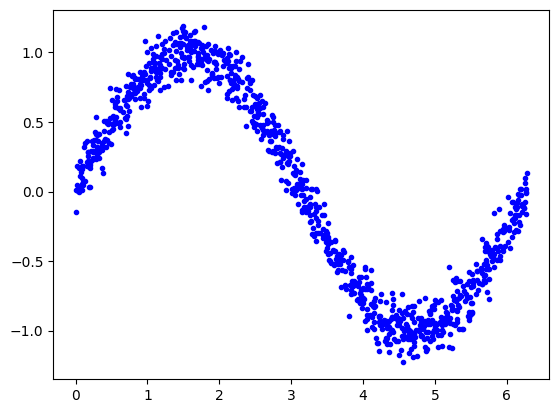

In [ ]:
plt.plot(x_values, y_values, 'b.')
plt.show()

In [ ]:
TRAIN_SPLIT =  int(0.6 * SAMPLES)
VALIDATE_SPLIT = int(0.2 * SAMPLES + TRAIN_SPLIT)
x_train, x_validate, x_test = np.split(x_values, [TRAIN_SPLIT, VALIDATE_SPLIT])
y_train, y_validate, y_test = np.split(y_values, [TRAIN_SPLIT, VALIDATE_SPLIT])

In [ ]:
model_1 = tf.keras.Sequential()
model_1.add(tf.keras.layers.Dense(16, activation='relu', input_shape=(1,)))
model_1.add(tf.keras.layers.Dense(1))
model_1.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

In [ ]:
history_1 = model_1.fit(x_train, y_train, epochs=1000, batch_size=16, validation_data=(x_validate, y_validate))

Epoch 1/1000
38/38 [==============================] - 1s 8ms/step - loss: 0.3953 - mae: 0.5442 - val_loss: 0.3900 - val_mae: 0.5414
Epoch 2/1000
38/38 [==============================] - 0s 3ms/step - loss: 0.3486 - mae: 0.5131 - val_loss: 0.3516 - val_mae: 0.5069
Epoch 3/1000
38/38 [==============================] - 0s 4ms/step - loss: 0.3127 - mae: 0.4858 - val_loss: 0.3164 - val_mae: 0.4857
Epoch 4/1000
38/38 [==============================] - 0s 3ms/step - loss: 0.2837 - mae: 0.4641 - val_loss: 0.2855 - val_mae: 0.4595
Epoch 5/1000
38/38 [==============================] - 0s 5ms/step - loss: 0.2588 - mae: 0.4457 - val_loss: 0.2590 - val_mae: 0.4381
Epoch 6/1000
38/38 [==============================] - 0s 4ms/step - loss: 0.2363 - mae: 0.4268 - val_loss: 0.2409 - val_mae: 0.4216
Epoch 7/1000
38/38 [==============================] - 0s 3ms/step - loss: 0.2202 - mae: 0.4119 - val_loss: 0.2280 - val_mae: 0.4135
Epoch 8/1000
38/38 [==============================] - 0s 5ms/step - loss: 0.

19/19 [==============================] - 0s 2ms/step


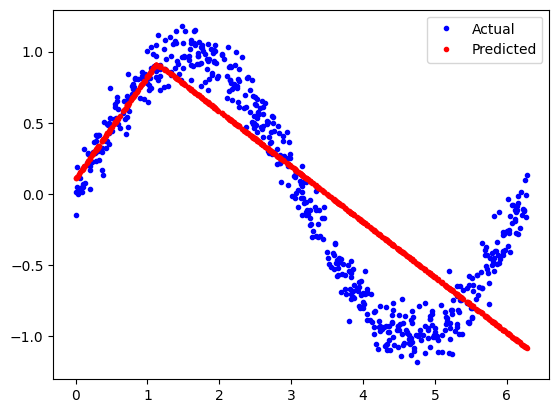

In [ ]:
predictions = model_1.predict(x_train)
plt.clf()
plt.plot(x_train, y_train, 'b.', label='Actual')
plt.plot(x_train, predictions, 'r.', label='Predicted')
plt.legend()
plt.show()

In [ ]:
model_2 = tf.keras.Sequential()
model_2.add(tf.keras.layers.Dense(16, activation='relu', input_shape=(1,)))
model_2.add(tf.keras.layers.Dense(16, activation='relu'))
model_2.add(tf.keras.layers.Dense(1))
model_2.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

In [ ]:
history_2 = model_2.fit(x_train, y_train, epochs=600, batch_size=16, validation_data=(x_validate, y_validate))

Epoch 1/600
38/38 [==============================] - 1s 9ms/step - loss: 0.5685 - mae: 0.6754 - val_loss: 0.5162 - val_mae: 0.6398
Epoch 2/600
38/38 [==============================] - 0s 5ms/step - loss: 0.4380 - mae: 0.5830 - val_loss: 0.4303 - val_mae: 0.5744
Epoch 3/600
38/38 [==============================] - 0s 4ms/step - loss: 0.3833 - mae: 0.5384 - val_loss: 0.3862 - val_mae: 0.5402
Epoch 4/600
38/38 [==============================] - 0s 4ms/step - loss: 0.3459 - mae: 0.5102 - val_loss: 0.3477 - val_mae: 0.5083
Epoch 5/600
38/38 [==============================] - 0s 4ms/step - loss: 0.3086 - mae: 0.4829 - val_loss: 0.3031 - val_mae: 0.4716
Epoch 6/600
38/38 [==============================] - 0s 5ms/step - loss: 0.2684 - mae: 0.4510 - val_loss: 0.2658 - val_mae: 0.4395
Epoch 7/600
38/38 [==============================] - 0s 5ms/step - loss: 0.2348 - mae: 0.4225 - val_loss: 0.2326 - val_mae: 0.4155
Epoch 8/600
38/38 [==============================] - 0s 4ms/step - loss: 0.2073 - m

19/19 [==============================] - 0s 2ms/step


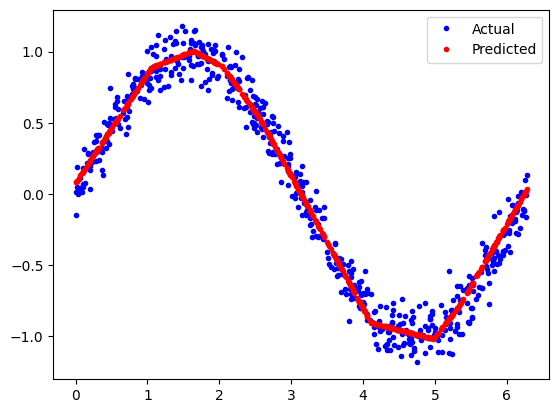

In [ ]:
y_train_predict_2 = model_2.predict(x_train)
plt.clf()
plt.plot(x_train, y_train, 'b.', label='Actual')
plt.plot(x_train, y_train_predict_2, 'r.', label='Predicted')
plt.legend()
plt.show()

7/7 [==============================] - 0s 2ms/step


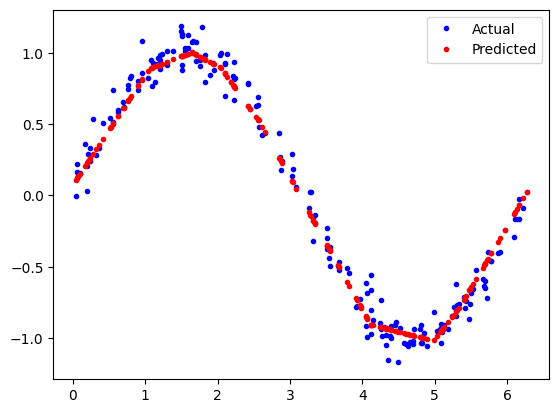

In [ ]:
y_test_predict = model_2.predict(x_test)
plt.clf()
plt.plot(x_test, y_test, 'b.', label='Actual')
plt.plot(x_test, y_test_predict, 'r.', label='Predicted')
plt.legend()
plt.show()

In [ ]:
loss = model_2.evaluate(x_test, y_test)

7/7 [==============================] - 0s 4ms/step - loss: 0.0101 - mae: 0.0772


In [ ]:
# Convert the model to tf lite
converter = tf.lite.TFLiteConverter.from_keras_model(model_2)
tflite_model = converter.convert()

# Print the signatures from the converted model
interpreter = tf.lite.Interpreter(model_content=tflite_model)
signatures = interpreter.get_signature_list()
print(signatures)


{'serving_default': {'inputs': ['dense_7_input'], 'outputs': ['dense_9']}}


In [ ]:
# Quantize model as done by STM32Cube.AI

def representative_dataset():
  for i in range(len(x_validate)):
    yield {
      "dense_7_input": np.float32(x_validate[i]),
      "dense_9": np.float32(y_validate[i]),
    }
converter = tf.lite.TFLiteConverter.from_keras_model(model_2)
converter.representative_dataset = representative_dataset
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
converter.target_spec.supported_types = [tf.int8]
converter.inference_input_type = tf.uint8  # or tf.int8/tf.float32
converter.inference_output_type = tf.uint8  # or tf.int8/tf.float32
tflite_quant_model = converter.convert()


/usr/local/lib/python3.10/dist-packages/tensorflow/lite/python/convert.py:765: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn("Statistics for quantized inputs were expected, but not "


In [ ]:
# Runs the models on test data

int_model = tf.lite.Interpreter(model_content=tflite_model)
int_quant_model = tf.lite.Interpreter(model_content=tflite_quant_model)

int_model.allocate_tensors()
int_quant_model.allocate_tensors()

model_input_details = int_model.get_input_details()[0]
model_output_details = int_model.get_output_details()[0]
quant_model_input_details = int_quant_model.get_input_details()[0]
quant_model_output_details = int_quant_model.get_output_details()[0]

model_in = model_input_details["index"]
model_in_dtype = model_input_details["dtype"]
model_out = model_output_details["index"]
quant_model_in = quant_model_input_details["index"]
quant_model_in_dtype = quant_model_input_details["dtype"]
quant_model_in_scale, quant_model_in_zero_point = quant_model_input_details["quantization"]
quant_model_out = quant_model_output_details["index"]
quant_model_out_scale, quant_model_out_zero_point = quant_model_output_details["quantization"]

y_test_predict_tflite = []
y_test_predict_tflite_quant = []
x_test_quant = []
y_test_quant = []
for x_val in x_test:
  x_val_t = tf.convert_to_tensor([[x_val]], dtype=model_in_dtype)
  int_model.set_tensor(model_in, x_val_t)
  int_model.invoke()
  y_val = int_model.get_tensor(model_out)[0][0]
  y_test_predict_tflite.append(y_val)

  x_val_quant = quant_model_in_dtype(x_val / quant_model_in_scale + quant_model_in_zero_point)
  x_val_quant_t = tf.convert_to_tensor([[x_val_quant]], dtype=quant_model_in_dtype)
  int_quant_model.set_tensor(quant_model_in, x_val_quant_t)
  int_quant_model.invoke()
  y_val_quant = int_quant_model.get_tensor(quant_model_out)[0][0]
  y_val = (np.float64(y_val_quant) - quant_model_out_zero_point) * quant_model_out_scale
  y_test_predict_tflite_quant.append(y_val)

  x_test_quant.append(x_val_quant)
  y_test_quant.append(y_val_quant)


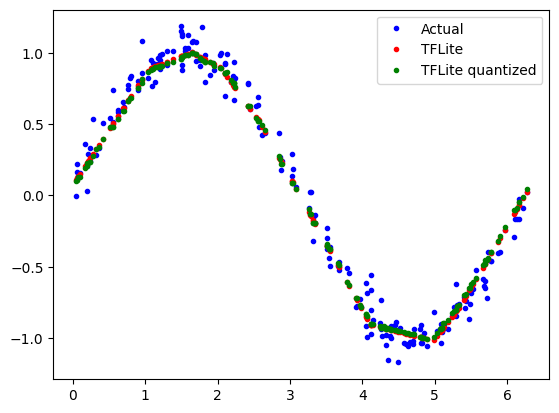

In [ ]:
plt.clf()
plt.plot(x_test, y_test, 'b.', label='Actual')
plt.plot(x_test, y_test_predict_tflite, 'r.', label='TFLite')
plt.plot(x_test, y_test_predict_tflite_quant, 'g.', label='TFLite quantized')
plt.legend()
plt.show()

In [ ]:
from google.colab import files

model_2.save('sine.h5')
open('sine.tflite','wb').write(tflite_model)
open('sine_quant.tflite','wb').write(tflite_quant_model)
np.savez('testdata.npz',x_test=x_test.reshape(200,1),y_test=y_test.reshape(200,1))

files.download('sine.h5')
files.download('sine.tflite')
files.download('sine_quant.tflite')
files.download('testdata.npz')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>